In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
FICHERO_DATA = 'data/data_reviews.csv'

In [3]:
df = pd.read_csv(FICHERO_DATA)

In [4]:
df.head()

,reseñas,IA,longitud,longitud_promedio,palabras_unicas,signos_de_puntuación,frecuencia_pronombres,variedad_lexica,entropia_lexica,expresiones,tfidf,palabras_complejas,tecnicismos,polaridad,subjetividad,coherencia
0,Necesitaba un nuevo movil y me decidí por este...,0,297,4.066667,0.733333,6,0,0.733333,5.267482,0,5.640761e-02,3,0,0.0,0.0,0.920000
1,Está en perfectas condiciones la batería al 10...,0,99,5.375000,1.000000,2,0,1.000000,4.000000,0,5.551115e-17,2,0,0.0,0.0,1.000000
2,Me llegó ayer el iPhone en perfectas condicion...,0,436,4.402439,0.695122,7,0,0.707317,5.710972,0,5.749596e-02,5,0,0.0,0.0,0.857143
3,Compré un iPhone 12 a este vendedor y hace un...,0,657,4.124031,0.581395,10,1,0.604651,5.880116,0,7.866846e-02,5,0,0.0,0.0,0.823529
4,Soy usuario de IPhone desde el principio. Teng...,0,596,4.109244,0.638655,11,0,0.655462,5.953860,0,7.357145e-02,4,0,0.0,0.0,0.953488


In [6]:
X = df.drop(columns=['reseñas', 'IA'])
y = df[['IA']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

# Crear el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba
X_test_scaled = scaler.transform(X_test)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Definir el modelo
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.5))  # Regularización para evitar el sobreajuste
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Salida binaria (0 o 1)

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.1, batch_size=32)


Epoch 1/10


c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7004 - loss: 0.5925 - val_accuracy: 0.8288 - val_loss: 0.4322
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.7986 - loss: 0.4757 - val_accuracy: 0.8322 - val_loss: 0.4221
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.7992 - loss: 0.4561 - val_accuracy: 0.8253 - val_loss: 0.4219
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8067 - loss: 0.4470 - val_accuracy: 0.8356 - val_loss: 0.4107
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.8029 - loss: 0.4543 - val_accuracy: 0.8356 - val_loss: 0.4124
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.7936 - loss: 0.4522 - val_accuracy: 0.8322 - val_loss: 0.4179
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.7942 - loss: 0.4612 - val_accuracy: 0.8288 - val_loss: 0.4077
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.8049 - loss: 0.4382 - val_accuracy: 0.8253 - val_loss

In [9]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Accuracy: {accuracy}')


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.7810 - loss: 0.4565
Accuracy: 0.7958903908729553


In [10]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Realizar predicciones en el conjunto de prueba
y_pred = (model.predict(X_test_scaled) > 0.5).astype('int32')

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Generar un informe de clasificación
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Confusion Matrix:
[[296  94]
 [ 55 285]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       390
           1       0.75      0.84      0.79       340

    accuracy                           0.80       730
   macro avg       0.80      0.80      0.80       730
weighted avg       0.80      0.80      0.80       730



23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step


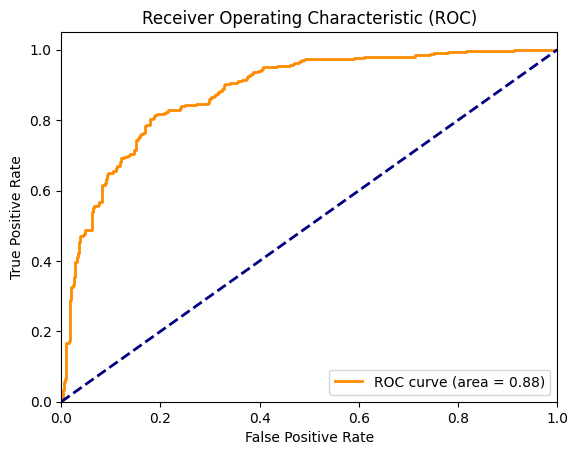

In [11]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcular las probabilidades de las predicciones
y_prob = model.predict(X_test_scaled)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [12]:
# Probamos a mejorar el modelo
from tensorflow.keras import regularizers

# Definir el modelo con regularización L2
model = Sequential()
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid'))



c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Entrenar el modelo con más épocas
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=20, validation_split=0.1, batch_size=32)


Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6582 - loss: 1.5380 - val_accuracy: 0.8185 - val_loss: 0.9747
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.7649 - loss: 0.9326 - val_accuracy: 0.8356 - val_loss: 0.6901
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7899 - loss: 0.6846 - val_accuracy: 0.8253 - val_loss: 0.5905
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.7969 - loss: 0.5917 - val_accuracy: 0.8356 - val_loss: 0.5332
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8019 - loss: 0.5369 - val_accuracy: 0.8151 - val_loss: 0.4996
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.7955 - loss: 0.5209 - val_accuracy: 0.8219 - val_loss: 0.4871
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.8119 - loss: 0.4999 - val_accuracy: 0.8459 - val_loss: 0.4715
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.7843 - loss: 0.5201 - val_accuracy: 0.8390 -

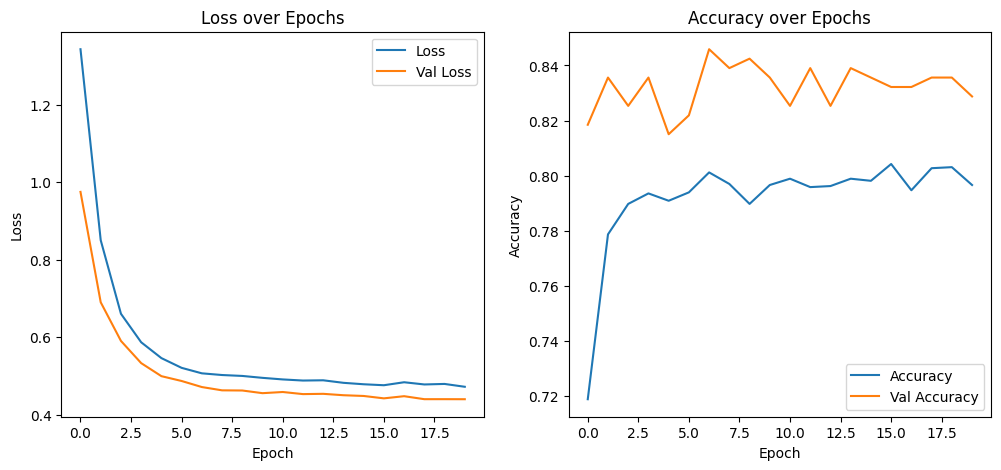

In [15]:
# Visualizar el proceso de entrenamiento 
# Graficar la pérdida y precisión del entrenamiento
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.show()


In [16]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy}')


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.7754 - loss: 0.4907
Test Accuracy: 0.7890411019325256


In [17]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = (model.predict(X_test_scaled) > 0.5).astype('int32')

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Confusion Matrix:
[[290 100]
 [ 54 286]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       390
           1       0.74      0.84      0.79       340

    accuracy                           0.79       730
   macro avg       0.79      0.79      0.79       730
weighted avg       0.80      0.79      0.79       730



In [18]:
model.save('data/mi_modelo_3.h5')